In [1]:
import matplotlib as plt
import numpy as np 
import pandas as pd
from scipy.optimize import curve_fit
import glob
import os

In [2]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


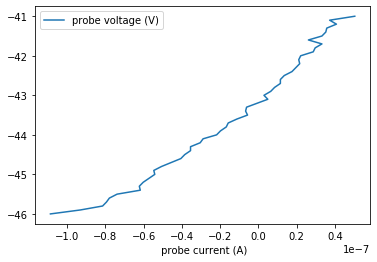

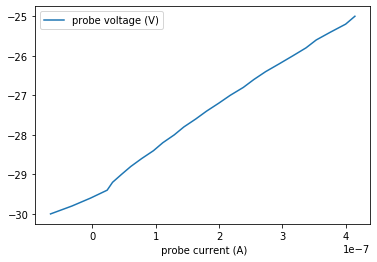

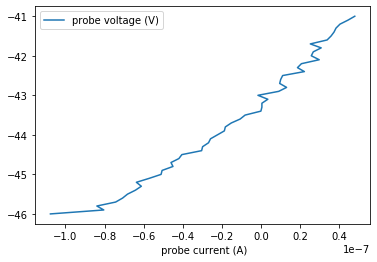

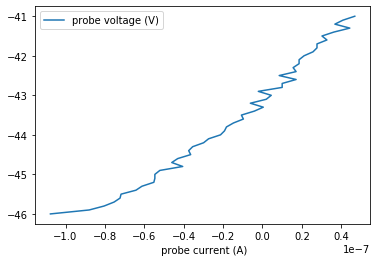

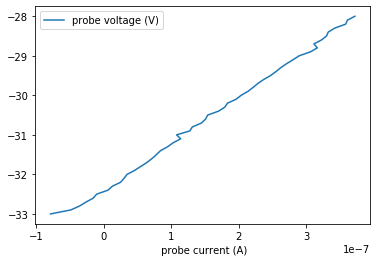

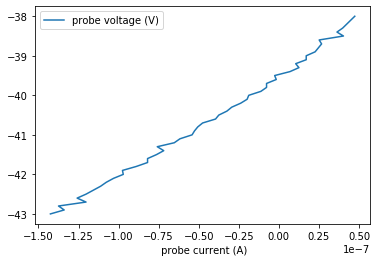

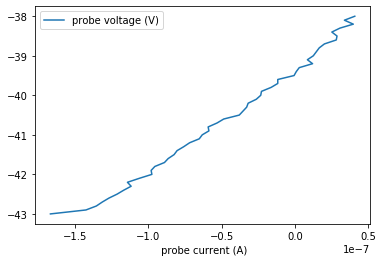

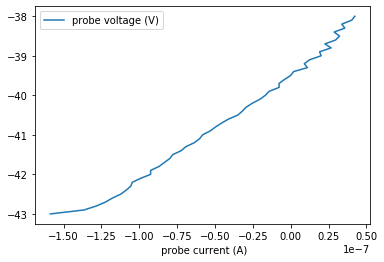

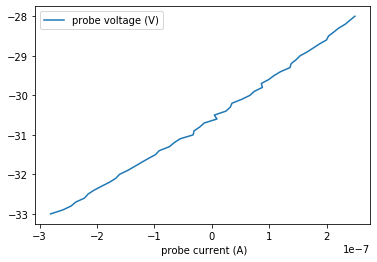

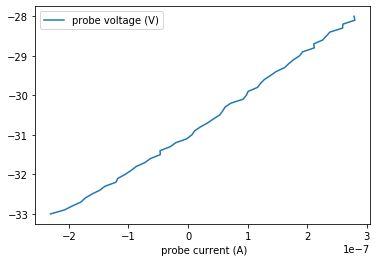

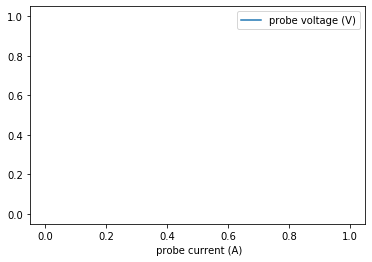

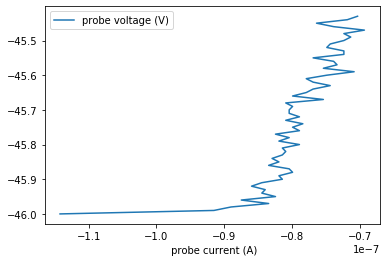

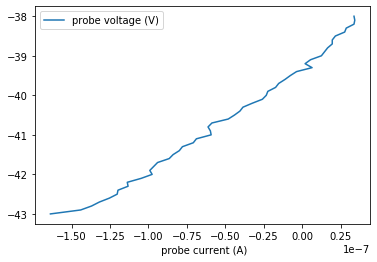

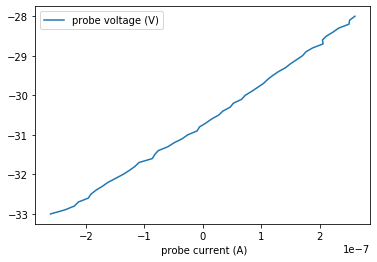

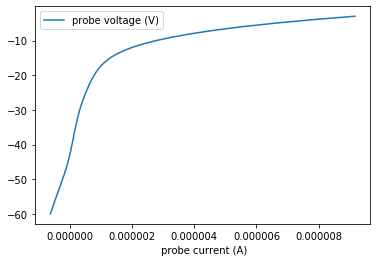

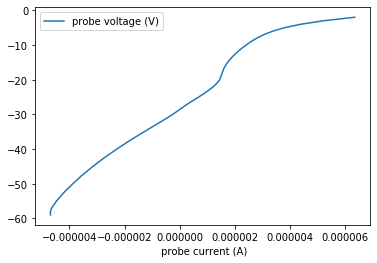

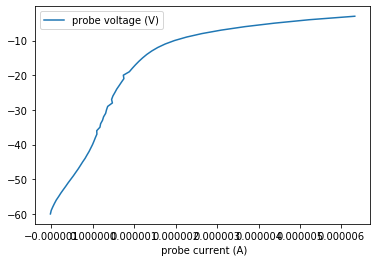

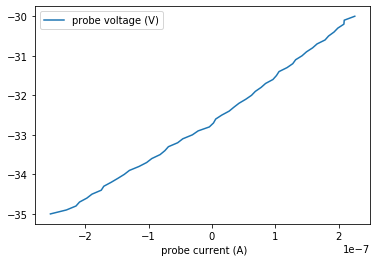

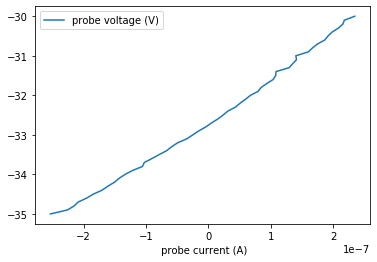

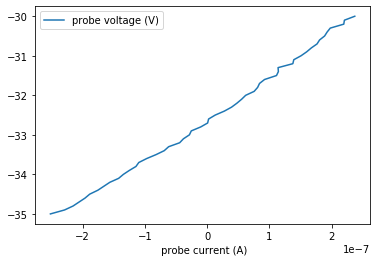

In [27]:
#use of glob to get all .txt files in the folder
path = os.getcwd()
txt_files = glob.glob(os.path.join(path, "*.txt"))
#print(txt_files)
data_frames = []

for file in txt_files: 
    df = pd.read_csv(file)
    
    df = df.drop(columns='Unnamed: 5')
    df = df.dropna(axis =0)

    df_columns = df.keys()
    df = df.astype('float64')
    df.plot(df_columns[1], df_columns[0])
#     print(df[df_columns[1]], df[df_columns[0]])
    data_frames.append(df)
    
    
    #display(df)
 

    





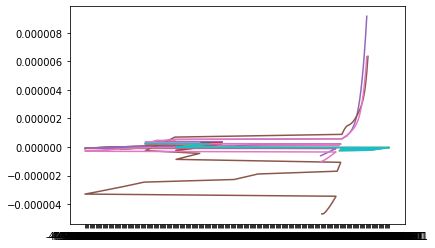

In [4]:
import matplotlib.pyplot as plt
for i in range(len(data_frames)):
#     print(type(i))
#     print(i.keys())
    probe_voltage = data_frames[i]['probe voltage (V)']
    probe_current = data_frames[i][' probe current (A)']
    plt.plot(probe_voltage, probe_current)
    

In [5]:
len(data_frames[0])

51

In [6]:
data_frames[0][' probe current (A)']

0    -1.086762e-07
1    -9.301785e-08
2    -8.140054e-08
3    -7.938017e-08
4    -7.786470e-08
5    -7.382392e-08
6    -6.170146e-08
7    -6.220656e-08
8    -6.018613e-08
9    -5.715553e-08
10   -5.412491e-08
11   -5.463003e-08
12   -5.058917e-08
13   -4.553819e-08
14   -4.048713e-08
15   -3.846672e-08
16   -3.543610e-08
17   -3.543609e-08
18   -3.038507e-08
19   -2.886974e-08
20   -2.179831e-08
21   -1.977791e-08
22   -1.674729e-08
23   -1.573707e-08
24   -1.119116e-08
25   -5.635015e-09
26   -6.645222e-09
27   -6.140118e-09
28   -5.839865e-10
29    4.971738e-09
30    2.951529e-09
31    6.486892e-09
32    8.507100e-09
33    1.153741e-08
34    1.153741e-08
35    1.355763e-08
36    1.759803e-08
37    1.961825e-08
38    2.163845e-08
39    2.113339e-08
40    2.214350e-08
41    2.870917e-08
42    2.971928e-08
43    3.325464e-08
44    2.618388e-08
45    3.325463e-08
46    3.527483e-08
47    3.577989e-08
48    4.083040e-08
49    3.729503e-08
50    5.042640e-08
Name:  probe current (A), dtype